In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D, ZeroPadding2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD


In [2]:
img_width=64
img_height=64

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [4]:
test_datagen=ImageDataGenerator(rescale=1/255.0)

In [5]:
train_data_generator=train_datagen.flow_from_directory(directory='corona_train', target_size=(img_width,img_height), class_mode='binary', batch_size=20 )

Found 5309 images belonging to 1 classes.


In [6]:
validation_data_generator=test_datagen.flow_from_directory(directory='corona_test', target_size=(img_width,img_height), class_mode='binary', batch_size=20)

Found 624 images belonging to 1 classes.


In [9]:
model=Sequential()
#filter=16
#filter_size=3,3
#flatten layer is used to convert multidimentional data into vector
model.add(Conv2D( 16, (3,3), input_shape=(img_width,img_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D( 32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [11]:
opt = SGD(lr=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
history=model.fit_generator(generator=train_data_generator, steps_per_epoch=len(train_data_generator), epochs=5,validation_data=validation_data_generator, validation_steps=len(validation_data_generator))

Epoch 1/5
266/266 [==============================] - 291s 1s/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 7.1991e-04 - val_accuracy: 1.0000
Epoch 2/5
266/266 [==============================] - 278s 1s/step - loss: 6.3627e-04 - accuracy: 1.0000 - val_loss: 2.2196e-04 - val_accuracy: 1.0000
Epoch 3/5
266/266 [==============================] - 260s 978ms/step - loss: 2.9963e-04 - accuracy: 1.0000 - val_loss: 1.2844e-04 - val_accuracy: 1.0000
Epoch 4/5
266/266 [==============================] - 266s 999ms/step - loss: 2.8513e-04 - accuracy: 1.0000 - val_loss: 8.0367e-05 - val_accuracy: 1.0000
Epoch 5/5
266/266 [==============================] - 285s 1s/step - loss: 1.4920e-04 - accuracy: 1.0000 - val_loss: 5.7823e-05 - val_accuracy: 1.0000


In [13]:
history.history

{'loss': [0.008213961884248324,
  0.0006360546807503171,
  0.0003001338755614745,
  0.0002854776653982485,
  0.00014949169385564947],
 'accuracy': [0.997363, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0007199120927907643,
  0.00022196144595909573,
  0.00012843931142469955,
  8.036705878566863e-05,
  5.782275991350616e-05],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

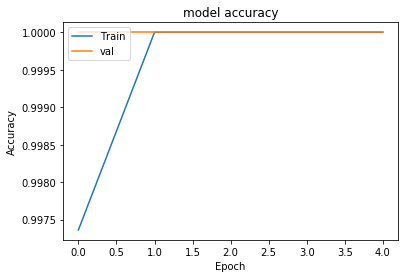

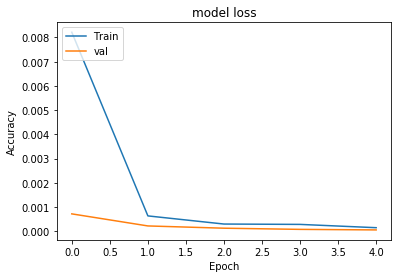

In [14]:
import matplotlib.pyplot as plt
#plot of accuracy and other mertics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

#for validation loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()